<a href="https://colab.research.google.com/github/iclal07/mnist_classification/blob/main/MNIST_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necesseary Libraries

In [57]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score

 Load and Preprocess the Data

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [45]:
# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

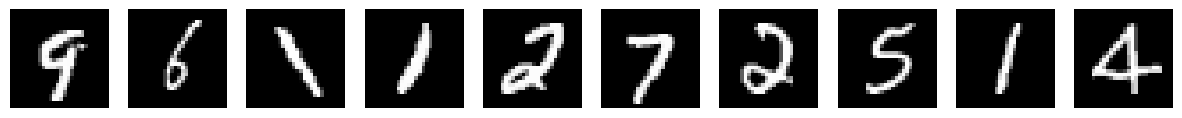

In [34]:
def display_sample_images(images, num_images=10):
    random_indices = np.random.choice(images.shape[0], num_images, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

display_sample_images(train_images)

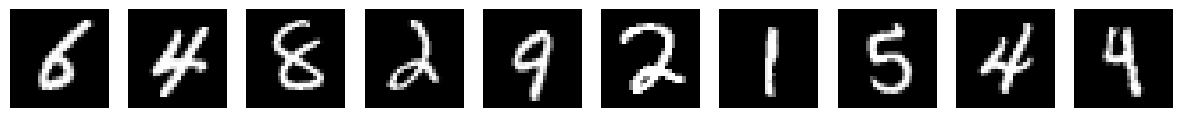

In [35]:
def display_sample_images(images, num_images=10):
    # Rastgele seçilen resimleri gösterme
    random_indices = np.random.choice(images.shape[0], num_images, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

display_sample_images(test_images)

In [37]:
print(train_labels[:10])
print(test_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Define the  First Model

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compile the Model

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [50]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 74s 80ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0371 - val_accuracy: 0.9910
Epoch 2/5
844/844 [==============================] - 92s 110ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0340 - val_accuracy: 0.9913
Epoch 3/5
844/844 [==============================] - 77s 91ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0341 - val_accuracy: 0.9895
Epoch 4/5
844/844 [==============================] - 74s 88ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0381 - val_accuracy: 0.9913
Epoch 5/5
844/844 [==============================] - 96s 113ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0400 - val_accuracy: 0.9898


Evaluate the Model

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 7s 23ms/step - loss: 0.0259 - accuracy: 0.9929


In [55]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

# Actual tags
true_labels = tf.argmax(test_labels, axis=1) if test_labels.shape[1] > 1 else test_labels.squeeze()

# Calculate the Precision, Recall and F1 Score
precision = precision_score(true_labels, predicted_labels, average="macro")
recall = recall_score(true_labels, predicted_labels, average="macro")
f1 = f1_score(true_labels, predicted_labels, average="macro")

print(f'First Model Evaluation Results')
print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 6s 19ms/step
First Model Evaluation Results
Test accuracy: 0.992900013923645
Test Loss: 0.025905493646860123
Precision: 0.9914354600269231
Recall: 0.9916046542045006
F1 Score: 0.991496038151271


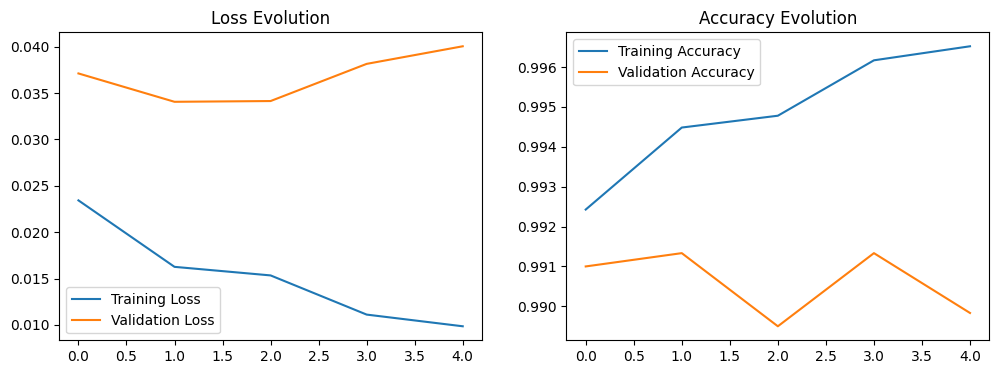

In [52]:
def plot_history(history):
    # Kayıp değerlerini çizdirme
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss Evolution')

    # Doğruluk değerlerini çizdirme
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Evolution')

    plt.show()

# Daha önce eğitilen modelin history nesnesini fonksiyona gönderme
plot_history(history)


### Data Augmentation

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)

In [56]:
history_augmented = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0290 - val_accuracy: 0.9913
Epoch 2/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0271 - val_accuracy: 0.9927
Epoch 3/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0304 - val_accuracy: 0.9920
Epoch 4/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0253 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0242 - val_accuracy: 0.9931


In [63]:
test_loss,test_acc = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

# Actual tags
true_labels = tf.argmax(test_labels, axis=1) if test_labels.shape[1] > 1 else test_labels.squeeze()

# Calculate the Precision, Recall and F1 Score
precision = precision_score(true_labels, predicted_labels, average="macro")
recall = recall_score(true_labels, predicted_labels, average="macro")
f1 = f1_score(true_labels, predicted_labels, average="macro")

print(f'Augmented Model Evaluation Results')
print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 4s 11ms/step
Augmented Model Evaluation Results
Test accuracy: 0.9930999875068665
Test Loss: 0.024184685200452805
Precision: 0.9931073779251923
Recall: 0.993067469539857
F1 Score: 0.9930631384516981


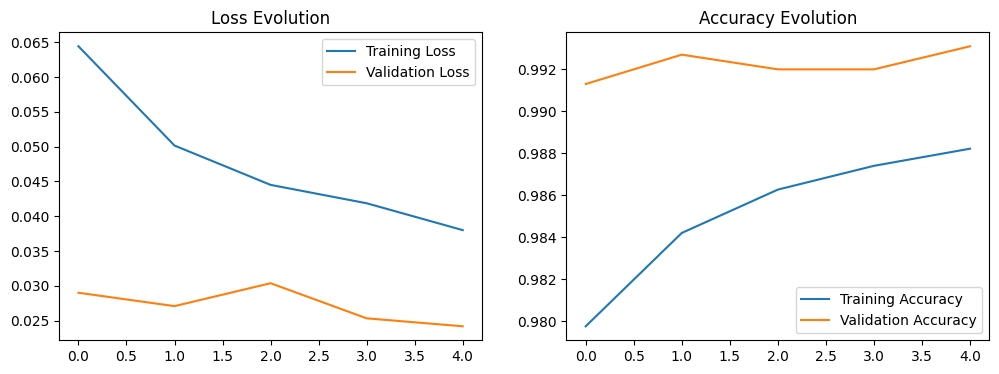

In [59]:
plot_history(history_augmented)

**When we compare the graphs and results before and after the data augmentation, we observe that the validation data reaches more accurate results with less loss.**

```
First Model Evaluation Results
Test accuracy: 0.992900013923645
Test Loss: 0.025905493646860123
Precision: 0.9914354600269231
Recall: 0.9916046542045006
F1 Score: 0.991496038151271
```

```
Augmented Model Evaluation Results
Test accuracy: 0.9930999875068665
Test Loss: 0.024184685200452805
Precision: 0.9931073779251923
Recall: 0.993067469539857
F1 Score: 0.9930631384516981
```

**Deeper CNN:**

In [18]:
model_deeper = models.Sequential()
model_deeper.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_deeper.add(layers.MaxPooling2D((2, 2)))
model_deeper.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_deeper.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_deeper.add(layers.MaxPooling2D((2, 2)))
model_deeper.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_deeper.add(layers.Flatten())
model_deeper.add(layers.Dense(128, activation='relu'))
model_deeper.add(layers.Dense(10, activation='softmax'))

Compile and Train the Deeper CNN Model

In [60]:
model_deeper.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=["accuracy"])

history_deeper = model_deeper.fit(datagen.flow(train_images, train_labels, batch_size=64),
                                  epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 138s 145ms/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 2/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 3/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0207 - val_accuracy: 0.9943
Epoch 4/5
938/938 [==============================] - 135s 144ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0219 - val_accuracy: 0.9940
Epoch 5/5
938/938 [==============================] - 134s 142ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0184 - val_accuracy: 0.9938


In [64]:
test_loss,test_acc = model_deeper.evaluate(test_images, test_labels)

predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

# Actual tags
true_labels = tf.argmax(test_labels, axis=1) if test_labels.shape[1] > 1 else test_labels.squeeze()

# Calculate the Precision, Recall and F1 Score
precision = precision_score(true_labels, predicted_labels, average="macro")
recall = recall_score(true_labels, predicted_labels, average="macro")
f1 = f1_score(true_labels, predicted_labels, average="macro")

print(f'Deeper CNN Model Evaluation Results')
print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 [==============================] - 3s 11ms/step
Deeper CNN Model Evaluation Results
Test accuracy: 0.9937999844551086
Test Loss: 0.018411941826343536
Precision: 0.9931073779251923
Recall: 0.993067469539857
F1 Score: 0.9930631384516981


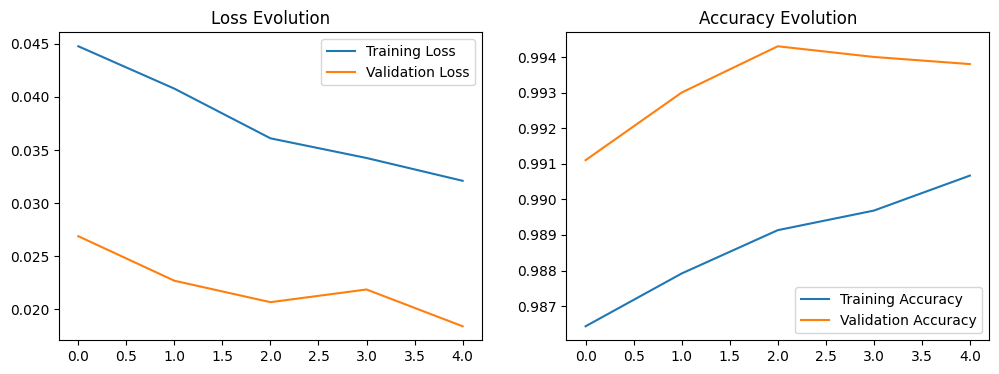

In [62]:
plot_history(history_deeper)


```
Augmented Model Evaluation Results
Test accuracy: 0.9930999875068665
Test Loss: 0.024184685200452805
Precision: 0.9931073779251923
Recall: 0.993067469539857
F1 Score: 0.9930631384516981
```


```
Deeper CNN Model Evaluation Results
Test accuracy: 0.9937999844551086
Test Loss: 0.018411941826343536
Precision: 0.9931073779251923
Recall: 0.993067469539857
F1 Score: 0.9930631384516981
```

Although there is not much difference in accuracy between depeer cnn and the first model, we can say that our deeper cnn model is better because the loss in the depper cnn model is less.

